# 0. Imports

In [1]:
# pip install pandas xlrd 

Import the libraries

In [2]:
import pandas as pd                 # Pandas to dataframes
from src.functions import clean_labels, clean_rows, drop_cols, clean_sex, null_values_sex, null_values_year, filter_country, filter_state, filter_year, filter_death
import matplotlib.pyplot as plt    # matplotlib to plots 

Load the document xls

In [3]:
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
df_sharks = pd.read_excel(url)

# 1. Data Recognizing
First view at the DataFrame

In [193]:
df_sharks.head(5)

,year,country,state,location,activity,sex,age,death
0,2024.0,AUSTRALIA,Queensland,Bargara Beach,Swimming,F,13,NaN
1,2024.0,USA,Hawaii,"Old Man's, Waikiki",Surfing,M,NaN,N
2,2024.0,USA,Hawaii,"Rainbows, Oahu",Swimming,F,11,N
3,2024.0,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,F,46,N
8,2024.0,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surfing,M,64,N


In [194]:
print(df_sharks.columns) # Obtenemos los nombres de las columnas
print(df_sharks.shape )  # La tabla de datos tiene 6969 filas x 23 columnas
print(df_sharks.size)    # La tabla tiene un total de 160287 datos

Index(['year', 'country', 'state', 'location', 'activity', 'sex', 'age',
       'death'],
      dtype='object')
(3183, 8)
25464


In [195]:
df_sharks.info() # Nos muestra tanto el tipo de dato por columna como los datos no nulos.

<class 'pandas.core.frame.DataFrame'>
Index: 3183 entries, 0 to 3997
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      3183 non-null   float64
 1   country   3183 non-null   object 
 2   state     3183 non-null   object 
 3   location  3146 non-null   object 
 4   activity  3008 non-null   object 
 5   sex       3011 non-null   object 
 6   age       2383 non-null   object 
 7   death     2980 non-null   object 
dtypes: float64(1), object(7)
memory usage: 223.8+ KB


In [196]:
df_sharks.isnull().sum() # Muestra la suma de valores nulos por columna

year          0
country       0
state         0
location     37
activity    175
sex         172
age         800
death       203
dtype: int64

# 2. Data Cleaning

## 2.1 Cleaning columns and rows

In [4]:
# We use the clean_labels function for put the names in lower case and replace spaces, dots and colons
df_sharks = clean_labels(df_sharks)

# We drop the rows that the year are too old
df_sharks = clean_rows(df_sharks)

# Drop the columns that are empty or it doesn't say nothing important
cols_to_drop = ['date','type','name','injury','time','species','source','pdf', 'href_formula', 'href', 'case_number', 'case_number_1', 'original_order','unnamed_21','unnamed_22']
df_sharks = drop_cols(df_sharks, cols_to_drop)

# Put the names of the sex in the same name
df_sharks = clean_sex(df_sharks)

In [5]:
# Show the new DataFrame
df_sharks.head(2)

,year,country,state,location,activity,sex,age,death
0,2024.0,AUSTRALIA,Queensland,Bargara Beach,Swimming,F,13,NaN
1,2024.0,USA,Hawaii,"Old Man's, Waikiki",Surfing,M,NaN,N


## 2.2 Null Values

In [6]:
# Replace the null values in the column 'sex' with the mode
df_sharks['sex'] = null_values_sex(df_sharks['sex'])


In [7]:
# Replace the null values in the column 'year' with the previous value
df_sharks['year'] = null_values_year(df_sharks['year'])

c:\Users\Lidia Mayor\Documents\GitHub\SharkattacksProyect\src\functions.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  year = year.fillna(method ='bfill')


## 2.3 Filtering 

In [8]:
# Delete the rows with a country that appears less than `value` times
df_country = filter_country(df_sharks, 30)

In [9]:
# Delete the rows with a state that appears less than `value` times
df_state = filter_state(df_country, 45)

In [10]:
# Delete the rows with year = 2024 to have a better analysis
df_year = filter_year(df_sharks)

In [11]:
# Delete the rows whose values in the column 'death' are not 'Y' or 'N' 
df_death = filter_death(df_sharks)

## 3. Hypothesis

In [12]:
# Create a table of attacks by gender
attacks_by_gender = df_sharks['sex'].value_counts()
attacks_by_gender = df_sharks.groupby('sex').size()

# Display the table
print(attacks_by_gender)

sex
F     618
M    3383
dtype: int64


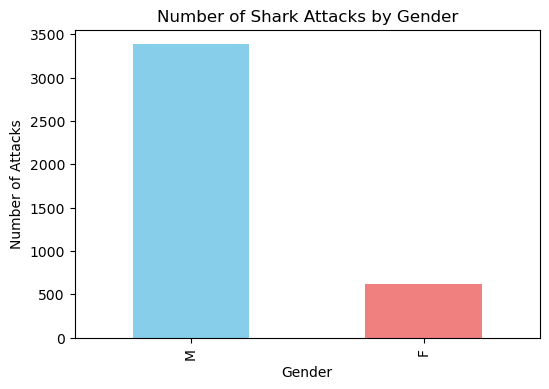

In [12]:
import matplotlib.pyplot as plt

# Create a table of attacks by gender
attacks_by_gender = df_sharks['sex'].value_counts()

# Plotting the bar chart
attacks_by_gender.plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(6, 4))

# Adding title and labels
plt.title('Number of Shark Attacks by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Attacks')

# Display the chart
plt.show()


Men are significantly more affected by shark attacks than women, with 3383 attacks on males (84.6%) compared to 618 on females (15.4%). This disparity likely stems from men engaging more in high-risk water activities like surfing or diving. Prevention efforts should target activities where men are more exposed to reduce attack risks.

In [13]:
# New DataFrame with country and sex
table_country_gender = df_country.groupby(['country', 'sex']).size().unstack(fill_value=0)

# Sort the values
table_country_gender['total'] = table_country_gender.sum(axis=1)
table_country_gender = table_country_gender.sort_values(by='total', ascending=False)
table_country_gender.drop(columns='total', inplace=True)
print(table_country_gender)

sex              F     M
country                 
USA            379  1512
AUSTRALIA       83   628
SOUTH AFRICA    14   366
BRAZIL           6   107
BAHAMAS         24    84
NEW ZEALAND     13    59
NEW CALEDONIA    4    52
REUNION          2    54
MEXICO           8    44
EGYPT           14    21


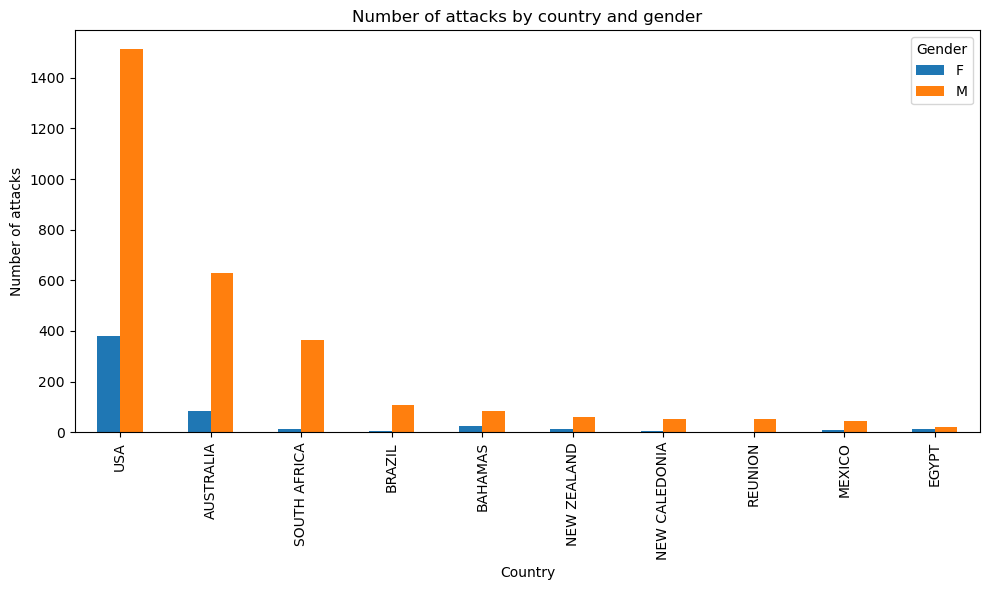

In [14]:
table_country_gender.plot(kind='bar', figsize=(10, 6))
plt.title("Number of attacks by country and gender")
plt.xlabel("Country")
plt.ylabel("Number of attacks")
plt.xticks(rotation=90)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

The data shows that shark attacks are predominantly on males across all countries. In the USA, men account for 1512 attacks compared to 379 on women. Australia and South Africa also have significant male dominance in attacks, with 628 and 366 male victims, respectively. Countries like Brazil, the Bahamas, and Mexico follow the same trend, where men are attacked far more frequently than women. This pattern suggests that men are more likely to be involved in water activities that increase their exposure to shark attacks globally.

In [15]:
# Group by state and gender
table_state_gender = df_state.groupby(['state', 'sex']).size().unstack(fill_value=0)

# Sort by the total number of attacks
table_state_gender['total'] = table_state_gender.sum(axis=1)
table_state_gender = table_state_gender.sort_values(by='total', ascending=False)
table_state_gender.drop(columns='total', inplace=True)
print(table_state_gender)

sex                      F    M
state                          
Florida                173  807
Hawaii                  54  196
California              32  205
New South Wales         20  208
Queensland              29  141
Western Australia       17  142
Western Cape Province    5  134
Eastern Cape Province    2  124
South Carolina          44   75
KwaZulu-Natal            7   95
North Carolina          31   66
Pernambuco               4   75
South Australia          6   56
Texas                   17   33


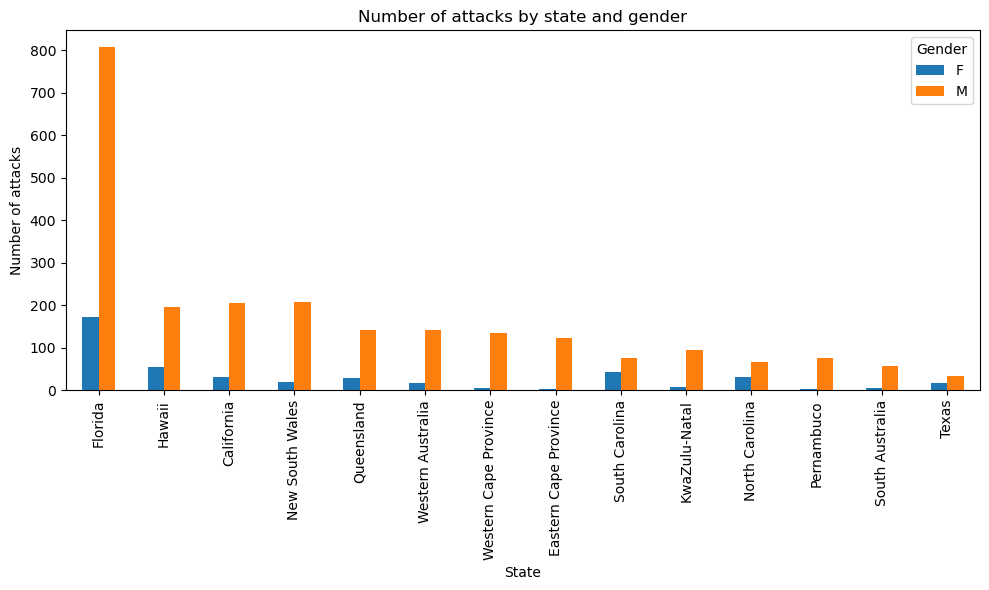

In [16]:
table_state_gender.plot(kind='bar', figsize=(10, 6))
plt.title("Number of attacks by state and gender")
plt.xlabel("State")
plt.ylabel("Number of attacks")
plt.xticks(rotation=90)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

Across all states, males are significantly more affected by shark attacks than females. In Florida, the most affected state, there are 807 male attacks compared to 173 female. Similar patterns are seen in Hawaii and California, with males experiencing far more attacks. This trend is consistent in Australia (e.g., New South Wales, Queensland) and South Africa (Western and Eastern Cape), suggesting that men are more likely to engage in activities that expose them to shark attacks across these regions.

In [17]:
# Count deaths and non-deaths
table_deaths = df_death['death'].value_counts().sort_values(ascending=False)
print(table_deaths)

death
N    3245
Y     444
Name: count, dtype: int64


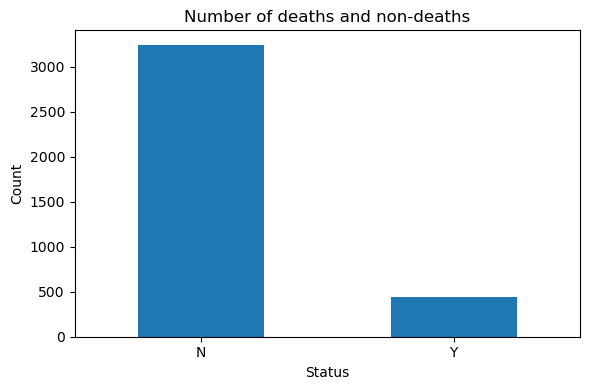

In [18]:
table_deaths.plot(kind='bar', figsize=(6, 4))
plt.title("Number of deaths and non-deaths")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The data shows that the vast majority of shark attacks are non-fatal, with 3245 cases (88%) where the victim survived, compared to 444 fatal attacks (12%). This suggests that while shark attacks are dangerous, they are not often deadly.

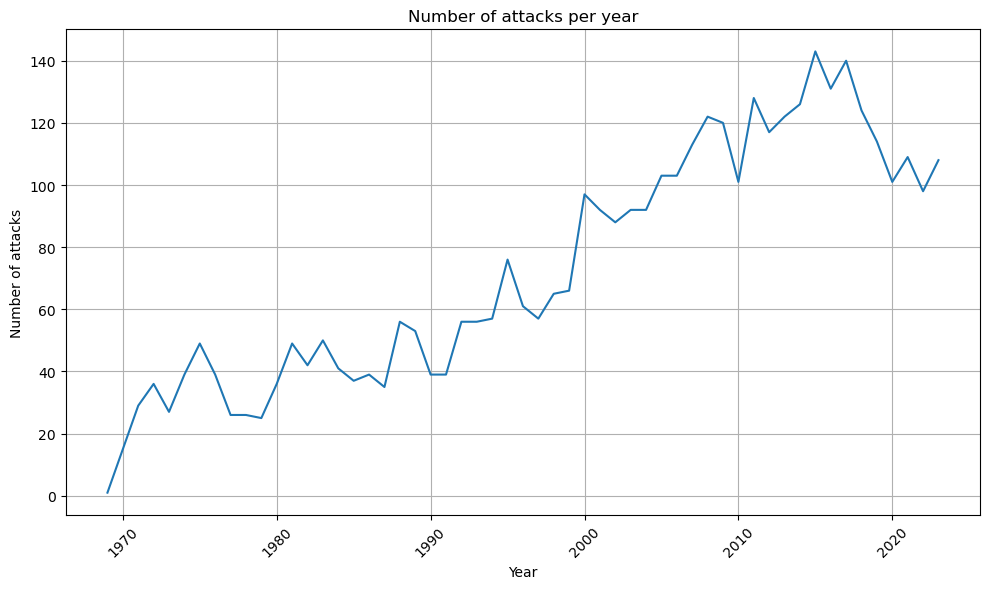

In [19]:
# Group by year
table_attacks_year = df_year.groupby('year').size().sort_values(ascending=False)
table_attacks_year.sort_index().plot(kind='line', figsize=(10, 6))
plt.title("Number of attacks per year")
plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The data shows that shark attacks have been relatively consistent over the years, with a peak in 2015 (143 attacks). Recent years, such as 2021 (109 attacks) and 2023 (108 attacks), also show notable activity. However, the numbers slightly decline as we go further back in time, with fewer attacks in the 1970s and earlier, indicating either better reporting in recent years or increased human-shark interactions.